# K Means

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.cluster import KMeans
import numpy as np

**Generate data**

In [3]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [4]:
sample, target_cluster = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0)

In [8]:
sample # list of coordinates i.e. list of lists
sample[:,0] # list of all x coordinates
sample[:,1] # list of all y coordinates

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

In [41]:
sample.shape

(150, 2)

**Plot Data**

In [5]:
pyplot.rcParams["figure.figsize"] = (12,8)

In [7]:
help(pyplot.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

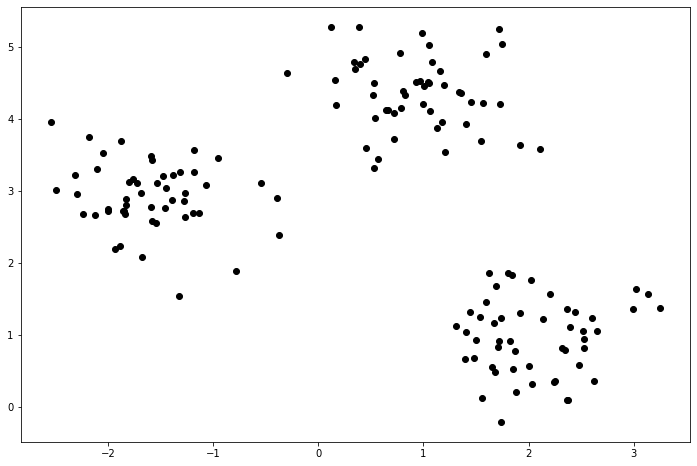

In [10]:
pyplot.scatter(sample[:,0], sample[:,1], c="black", marker="o")
pyplot.show()

> We can cleary see there are 3 clusters   
> But lets see if K means algorithm can identify the same clusters

In [11]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)

In [15]:
km

KMeans(n_clusters=3, random_state=0)

In [13]:
type(km)

sklearn.cluster._kmeans.KMeans

___

In [12]:
model = km.fit(sample)

In [16]:
model

KMeans(n_clusters=3, random_state=0)

In [14]:
type(model)

sklearn.cluster._kmeans.KMeans

___

In [17]:
prediction = km.predict(sample)

In [18]:
prediction

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [19]:
type(prediction)

numpy.ndarray

___

### Plot how kmeans clustered the data

In [92]:
def plot_clusters(sample, prediction, plot_centroids=False):
    x_centroids = []
    y_centroids = []
    
    for cluster in set(prediction):
        x = sample[(prediction == cluster),0]  # grab x coordinates of observations in that cluster
        y = sample[(prediction == cluster),1]  # grab y coordinates of observations in that cluster
        x_centroids.append(np.mean(x))
        y_centroids.append(np.mean(y))
        
        pyplot.scatter(x, y, s=50, marker="s", label=f"cluster {cluster}")  # plot coordinates for each cluster
    
    if plot_centroids:
        pyplot.scatter(x_centroids, y_centroids, marker="*", c="red", s=250, label="centroids")
    
    pyplot.legend()
    pyplot.grid()
    pyplot.show()

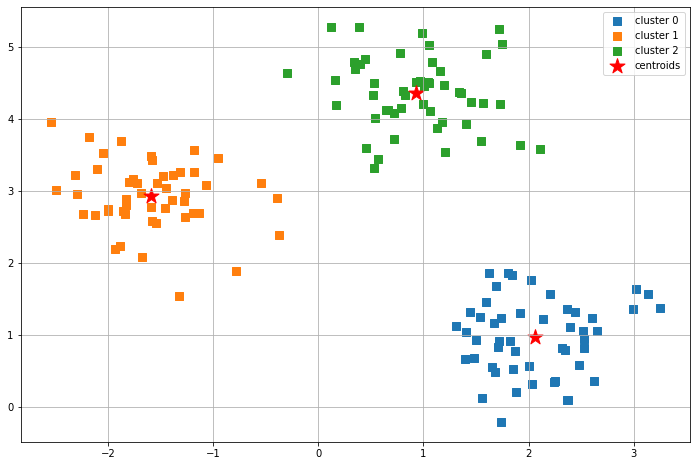

In [93]:
plot_clusters(sample, prediction, plot_centroids=True)

**Understanding the syntax of the function**

In [84]:
small_sample = sample[:3]
small_sample

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181]])

In [83]:
small_sample[[True, True, False], 0]

array([2.60509732, 0.5323772 ])

In [78]:
sample[(prediction == 2), 0]

array([ 0.5323772 ,  0.802314  ,  0.5285368 ,  1.59141542,  1.74265969,
        1.72039618,  0.72144399,  0.16117091,  0.64003985,  1.13280393,
        1.04829186,  1.2091013 ,  0.3498724 ,  0.65910903,  1.15445328,
        0.34102758,  2.11114739,  1.45131429,  0.44089377,  1.08040757,
        0.72086751,  1.34081536,  1.06498315,  1.03972612, -0.30022483,
        0.12313498,  1.54597042,  0.38970838,  0.82049381,  1.56565986,
        0.96217896,  0.4519936 ,  1.19820169,  0.99914934,  0.77468161,
        1.91784543,  1.05374379,  1.72330962,  0.92466065,  0.39369516,
        0.78260667,  0.98152009,  1.00952869,  1.40848818,  0.5408715 ,
        0.5226209 ,  0.16932115,  0.56969694,  1.35678894,  1.1774409 ])

In [77]:
sample[(prediction == 2)][:,0]

array([ 0.5323772 ,  0.802314  ,  0.5285368 ,  1.59141542,  1.74265969,
        1.72039618,  0.72144399,  0.16117091,  0.64003985,  1.13280393,
        1.04829186,  1.2091013 ,  0.3498724 ,  0.65910903,  1.15445328,
        0.34102758,  2.11114739,  1.45131429,  0.44089377,  1.08040757,
        0.72086751,  1.34081536,  1.06498315,  1.03972612, -0.30022483,
        0.12313498,  1.54597042,  0.38970838,  0.82049381,  1.56565986,
        0.96217896,  0.4519936 ,  1.19820169,  0.99914934,  0.77468161,
        1.91784543,  1.05374379,  1.72330962,  0.92466065,  0.39369516,
        0.78260667,  0.98152009,  1.00952869,  1.40848818,  0.5408715 ,
        0.5226209 ,  0.16932115,  0.56969694,  1.35678894,  1.1774409 ])

In [20]:
x_centroids = []
y_centroids = []

for cluster in set(prediction):
    print(cluster)

0
1
2


### Calculating distortion and using an elbow plow to decide and apporpriate amount of clusters for a data set

distortion is basically the variance in euclidean distance between points of a cluster

in sklearn it's called "inertia"

In [99]:
help(pyplot.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [100]:
def plot_distortion(sample, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i,
                    init="k-means++",
                    n_init=10,
                    random_state=0)
        km.fit(sample)
        distortions.append(km.inertia_)
    
    pyplot.plot(range(1, max_clusters + 1), distortions, marker="o")
    pyplot.xlabel("Number of clusters")
    pyplot.ylabel("Distortion")
    pyplot.show()

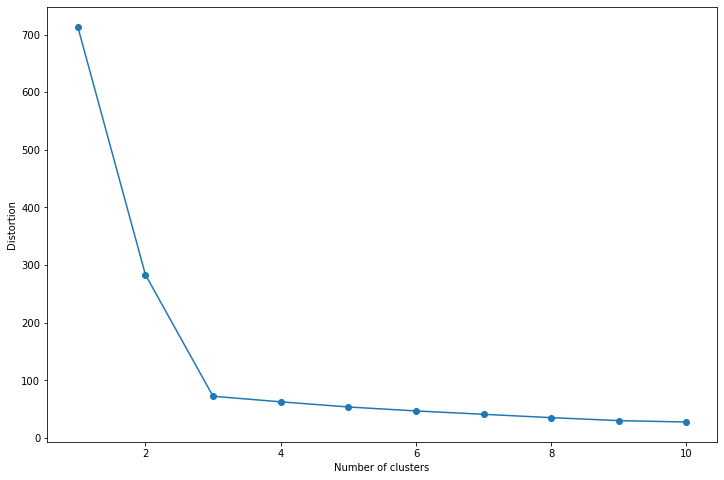

In [101]:
plot_distortion(sample, 10)